# HW-4

## Dataset-4 Physical Unclonable Functions Data Set

### The dataset is generated from Physical Unclonable Functions (PUFs) simulation, specifically XOR Arbiter PUFs. PUFs are used for authentication purposes. There are two datasets generated from k-XOR Arbiter PUFs simulation. 6-XOR_64bit dataset is used in this homework. It consists of 2.4 million rows and 65 attributes where the last attribute is the class label (1 or -1). It is divided into two sets: training set (2 million) and testing set (400K). 
*Aseeri, A. O., Zhuang, Y., & Alkatheiri, M. S. (2018, July). A Machine Learning-Based Security Vulnerability Study on XOR PUFs for Resource-Constraint Internet of Things. In 2018 IEEE International Congress on Internet of Things (ICIOT) (pp. 49-56). IEEE.

### Features of Dataset 

Data Set Characteristics:Multivariate
Number of Instances:6000000
Area:Computer
Attribute Characteristics:Integer
Number of Attributes:129
Associated Tasks:Classification
Missing Values:N/A

In [2]:
#used libraries
library(data.table)
library(Matrix)
library(tidyverse)
library(dplyr)
library(glmnet)
library(caret)
library(data.table)
require(lubridate)
library(forecast)
library(e1071)
library(rpart)
require(data.table)
require(lubridate)
require(caret)
library(gbm)
library(rpart.plot)

In [3]:
data_test1 = read.csv(file="C:/Users/OZGE/OneDrive - boun.edu.tr/doktora_ders/IE582/HW4/XOR_Arbiter_PUFs/XOR_Arbiter_PUFs/6xor_64bit/test_6xor_64dim.csv",header = TRUE, sep = ",")
data_train1 = read.csv(file="C:/Users/OZGE/OneDrive - boun.edu.tr/doktora_ders/IE582/HW4/XOR_Arbiter_PUFs/XOR_Arbiter_PUFs/6xor_64bit/train_6xor_64dim.csv",header = TRUE, sep = ",")


### Because of the data set size model fit failed. For this reason first 600 rows are used for training and 400 rows are used testing.

In [4]:
data_test1 = data_test1[1:400,]
data_train1 = data_train1[1:600,]


test_set1 = as.data.frame(data_test1)
train_set1 = as.data.frame(data_train1)

test_set1[,65] = as.factor(test_set1[,65])
train_set1[,65] = as.factor(train_set1[,65])

colnames(train_set1) = c(paste0("att_", 1:64),"class")
colnames(test_set1) = c(paste0("att_", 1:64),"class")


class_1_test = test_set1[,65]
class_1_train = train_set1[,65]

In [5]:
#lambda determination with lasso model
x_train = train_set1[,1:64]
lasso_model = cv.glmnet(as.matrix(x_train) , class_1_train, family="binomial", nfolds = 10)

In [6]:
lasso_model

$lambda
 [1] 0.0437521877 0.0398653639 0.0363238348 0.0330969255 0.0301566858
 [6] 0.0274776490 0.0250366104 0.0228124269 0.0207858338 0.0189392776
[11] 0.0172567644 0.0157237210 0.0143268690 0.0130541094 0.0118944183
[16] 0.0108377510 0.0098749550 0.0089976913 0.0081983612 0.0074700414
[21] 0.0068064235 0.0062017596 0.0056508123 0.0051488097 0.0046914037
[26] 0.0042746323 0.0038948858 0.0035488748 0.0032336026 0.0029463382
[31] 0.0026845937 0.0024461018 0.0022287968 0.0020307967 0.0018503863
[36] 0.0016860031 0.0015362232 0.0013997494 0.0012753995 0.0011620965
[41] 0.0010588591 0.0009647929 0.0008790834 0.0008009881 0.0007298305
[46] 0.0006649944 0.0006059181 0.0005520900 0.0005030438

$cvm
 [1] 1.389431 1.393099 1.396681 1.400260 1.403626 1.406383 1.408825 1.411829
 [9] 1.415456 1.419328 1.423438 1.427687 1.431884 1.435736 1.439143 1.442468
[17] 1.445881 1.449147 1.452425 1.455753 1.459025 1.462419 1.465706 1.468771
[25] 1.471703 1.474434 1.477046 1.479530 1.481882 1.484099 1.486209 

In [7]:
#Model 1 - Lasso Regression
#lambda.min and another two lambda value is used to model prediction
lambda_seq = c(0.04375219, 0.03, 0.05)
train_set1=data.frame(train_set1)
set.seed(1)
n_repeats=5
n_folds=10
lasso_grid = expand.grid(alpha=1,lambda=lambda_seq)
Control=trainControl(method = "repeatedcv",
                           number = n_folds,
                           repeats = n_repeats)                         
lassolr_fit = train(class~ .,data=train_set1,
                 method = "glmnet", 
                 family="binomial",
                 tuneGrid = lasso_grid,
                 trControl = Control) 

In [8]:
summary(lassolr_fit)
lassolr_fit

            Length Class      Mode     
a0            51   -none-     numeric  
beta        3264   dgCMatrix  S4       
df            51   -none-     numeric  
dim            2   -none-     numeric  
lambda        51   -none-     numeric  
dev.ratio     51   -none-     numeric  
nulldev        1   -none-     numeric  
npasses        1   -none-     numeric  
jerr           1   -none-     numeric  
offset         1   -none-     logical  
classnames     2   -none-     character
call           5   -none-     call     
nobs           1   -none-     numeric  
lambdaOpt      1   -none-     numeric  
xNames        64   -none-     character
problemType    1   -none-     character
tuneValue      2   data.frame list     
obsLevels      2   -none-     character
param          1   -none-     list     

glmnet 

600 samples
 64 predictor
  2 classes: '-1', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 540, 541, 541, 539, 539, 541, ... 
Resampling results across tuning parameters:

  lambda      Accuracy   Kappa      
  0.03000000  0.5210807  -0.01868227
  0.04375219  0.5416727   0.00000000
  0.05000000  0.5416727   0.00000000

Tuning parameter 'alpha' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were alpha = 1 and lambda = 0.05.

In [101]:
#accuracy of lasso model at alpha = 1 and lambda = 0.05
model_lasso_accuracy = 0.5416727

In [98]:
#Prediction with lasso
predict_lasso = predict(lassolr_fit, test_set1 )
cm = confusionMatrix(predict_lasso, test_set1$class)
cm

Confusion Matrix and Statistics

          Reference
Prediction  -1   1
        -1 211 189
        1    0   0
                                          
               Accuracy : 0.5275          
                 95% CI : (0.4773, 0.5773)
    No Information Rate : 0.5275          
    P-Value [Acc > NIR] : 0.5203          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 1.0000          
            Specificity : 0.0000          
         Pos Pred Value : 0.5275          
         Neg Pred Value :    NaN          
             Prevalence : 0.5275          
         Detection Rate : 0.5275          
   Detection Prevalence : 1.0000          
      Balanced Accuracy : 0.5000          
                                          
       'Positive' Class : -1              
                              

In [104]:
#Overall Accuracy
overall <- cm$overall
overall.accuracy <- overall['Accuracy'] 
comp_lasso = c()
comp_lasso[1] = as.numeric(model_lasso_accuracy)
comp_lasso[2]= as.numeric(overall.accuracy)
overall.kappa = overall['Kappa']
overall.pvalue = overall['AccuracyPValue']
comp_lasso[3] = as.numeric(overall.kappa)
comp_lasso[4] = as.numeric(overall.pvalue)

In [12]:
#Model 2- Decision Tree
set.seed(1)
n_repeats=5
n_folds=10
Control=trainControl(method = "repeatedcv",
                           number = n_folds,
                           repeats = n_repeats)
#complexity parameter is selected as 0.01, 0.03, 0.05
grid_tree = expand.grid(cp=c(0.01, 0.03, 0.05))
#Three different model is trained with different minbucket values
tree_fit_minbucket7 = train(class~ .,data=train_set1,
                 method = "rpart", 
                 trControl = Control,
                control = rpart.control(minbucket=7),
                tuneGrid = grid_tree)
tree_fit_minbucket10 = train(class~ .,data=train_set1,
                 method = "rpart", 
                 trControl = Control,
                control = rpart.control(minbucket=10),
                            tuneGrid = grid_tree)
tree_fit_minbucket5 = train(class~ .,data=train_set1,
                 method = "rpart", 
                 trControl = Control,
                control = rpart.control(minbucket=5),
                tuneGrid = grid_tree)

In [13]:
cat("Decision Tree Results @ minbucket=7")
tree_fit_minbucket7
cat("Decision Tree Results @ minbucket=5")
tree_fit_minbucket5
cat("Decision Tree Results @ minbucket=10")
tree_fit_minbucket10

Decision Tree Results @ minbucket=7

CART 

600 samples
 64 predictor
  2 classes: '-1', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 540, 541, 541, 539, 539, 541, ... 
Resampling results across tuning parameters:

  cp    Accuracy   Kappa      
  0.01  0.5050930  -0.00302823
  0.03  0.5118677  -0.00648464
  0.05  0.5287654  -0.01734953

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.05.

Decision Tree Results @ minbucket=5

CART 

600 samples
 64 predictor
  2 classes: '-1', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 540, 539, 540, 540, 541, 540, ... 
Resampling results across tuning parameters:

  cp    Accuracy   Kappa      
  0.01  0.4883533  -0.03759745
  0.03  0.5002122  -0.03629230
  0.05  0.5317551  -0.01449409

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.05.

Decision Tree Results @ minbucket=10

CART 

600 samples
 64 predictor
  2 classes: '-1', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 540, 541, 540, 539, 540, 540, ... 
Resampling results across tuning parameters:

  cp    Accuracy   Kappa      
  0.01  0.4976113  -0.01774018
  0.03  0.4998879  -0.03910739
  0.05  0.5209643  -0.02871807

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.05.

In [103]:
#Accuracy of decision tree at cp = 0.05 and minbucket=5
model_tree_accuracy = 0.5317551

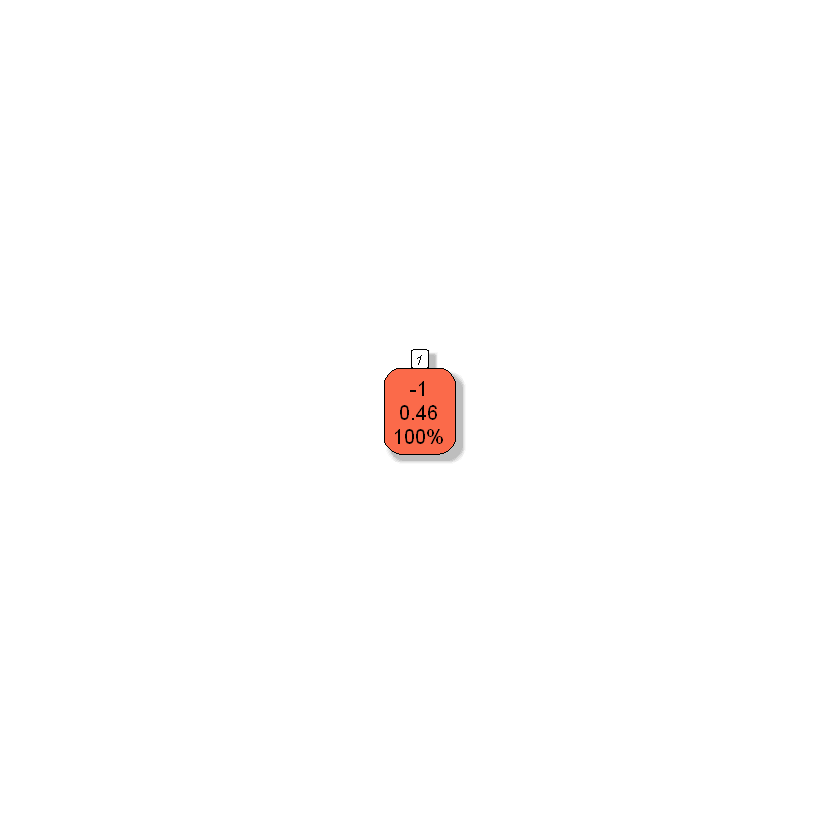

In [20]:
#Accuracy of the model when minbucket is equal to 5 is higher than the others.
rpart.plot(tree_fit_minbucket5$finalModel, box.palette="RdBu", shadow.col="gray", nn=TRUE)


### Desicion tree approach unable to model the dataset as can be seen from the figure.

In [23]:
#Accuracy of the model when minbucket is equal to 5 is higher than the others.
#For this reason this model is used to predict.
predict_tree = predict(tree_fit_minbucket5, test_set1 )
cm1 = confusionMatrix(predict_tree, test_set1$class)
cm1

Confusion Matrix and Statistics

          Reference
Prediction  -1   1
        -1 211 189
        1    0   0
                                          
               Accuracy : 0.5275          
                 95% CI : (0.4773, 0.5773)
    No Information Rate : 0.5275          
    P-Value [Acc > NIR] : 0.5203          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 1.0000          
            Specificity : 0.0000          
         Pos Pred Value : 0.5275          
         Neg Pred Value :    NaN          
             Prevalence : 0.5275          
         Detection Rate : 0.5275          
   Detection Prevalence : 1.0000          
      Balanced Accuracy : 0.5000          
                                          
       'Positive' Class : -1              
                              

In [106]:
overall_1 <- cm1$overall
overall.accuracy_1 <- overall_1['Accuracy'] 
comp_tree = c()
comp_tree[1] = as.numeric(model_tree_accuracy)
comp_tree[2]= as.numeric(overall.accuracy_1)
overall.kappa_1 = overall_1['Kappa']
overall.pvalue_1 = overall_1['AccuracyPValue']
comp_tree[3] = as.numeric(overall.kappa_1)
comp_tree[4] = as.numeric(overall.pvalue_1)

In [26]:
# Model 3: Random Forest
set.seed(1)
n_folds=10
Control=trainControl(method = "cv",
                           number = n_folds)  
#the minimal number of observations per tree leaf is determined with different values.
#Normally, it is set to 5
grid_random_forest <- expand.grid(mtry = c(1,5,9,11,15)) 

rf_fit = train(class~ ., data=train_set1,
                 method = "rf", 
                 ntree=500,
                 nodesize=5,
                 trControl = Control,
                 tuneGrid = grid_random_forest)

Random Forest 

600 samples
 64 predictor
  2 classes: '-1', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 540, 541, 541, 539, 539, 541, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa       
   1    0.5433676   0.005550192
   5    0.5432838   0.030492921
   9    0.5299759   0.009351155
  11    0.5319204   0.012633513
  15    0.5185297  -0.012094155

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 1.

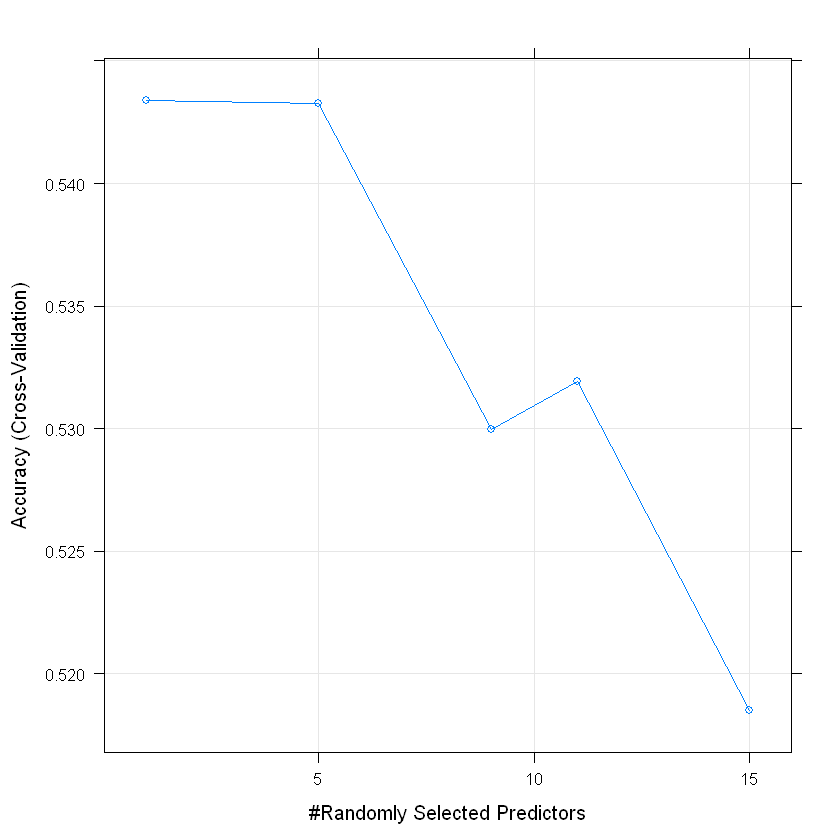

In [27]:
rf_fit
plot(rf_fit)

In [107]:
#Accuracy of random forest at mtry=1
model_forest_accuracy = 0.5433676

In [108]:
#Prediction by using random forests method
predict_forest = predict(rf_fit, test_set1 )
cm_2 = confusionMatrix(predict_forest, test_set1$class)
overall_2 <- cm_2$overall
overall.accuracy_2 <- overall_2['Accuracy'] 
comp_forest = c()
comp_forest[1] = as.numeric(model_forest_accuracy)
comp_forest[2]= as.numeric(overall.accuracy_2)
overall.kappa_2 = overall_2['Kappa']
overall.pvalue_2 = overall_2['AccuracyPValue']
comp_forest[3] = as.numeric(overall.kappa_2)
comp_forest[4] = as.numeric(overall.pvalue_2)

In [30]:
# Model 4: Stochastic Gradient Boosting
set.seed(1)
n_folds=10
Control=trainControl(method = "cv",
                           number = n_folds)  
#Number of trees are set to 200, 400 and 600
#Interaction depth is set to 1, 3, and 5
#Learning rate is et to 0.001,0.01,0.1
#minobsinnode is set to 10 to avoid underfitting
grid_sgb <- expand.grid(n.trees = c(200,400,600), interaction.depth =c(1,3,5),shrinkage = c(0.001,0.01,0.1),n.minobsinnode = 10) 

sgb_fit = train(class~ ., data=train_set1,
                method = 'gbm',
                 trControl = Control,
                 tuneGrid = grid_sgb)

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3790             nan     0.0010   -0.0000
     2        1.3790             nan     0.0010   -0.0000
     3        1.3790             nan     0.0010   -0.0000
     4        1.3790             nan     0.0010   -0.0000
     5        1.3789             nan     0.0010   -0.0000
     6        1.3789             nan     0.0010   -0.0000
     7        1.3789             nan     0.0010   -0.0000
     8        1.3789             nan     0.0010   -0.0000
     9        1.3789             nan     0.0010   -0.0000
    10        1.3789             nan     0.0010   -0.0000
    20        1.3787             nan     0.0010   -0.0000
    40        1.3783             nan     0.0010   -0.0000
    60        1.3779             nan     0.0010   -0.0000
    80        1.3775             nan     0.0010   -0.0000
   100        1.3771             nan     0.0010   -0.0000
   120        1.3768             nan     0.0010   -0.0000
   140        

In [31]:
sgb_fit

Stochastic Gradient Boosting 

600 samples
 64 predictor
  2 classes: '-1', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 540, 541, 541, 539, 539, 541, ... 
Resampling results across tuning parameters:

  shrinkage  interaction.depth  n.trees  Accuracy   Kappa       
  0.001      1                  200      0.5416736   0.000000000
  0.001      1                  400      0.5416736   0.000000000
  0.001      1                  600      0.5416736   0.000000000
  0.001      3                  200      0.5416736   0.000000000
  0.001      3                  400      0.5433685   0.004005006
  0.001      3                  600      0.5450079   0.010335812
  0.001      5                  200      0.5416736   0.000000000
  0.001      5                  400      0.5450634   0.008010013
  0.001      5                  600      0.5383403  -0.002329408
  0.010      1                  200      0.5381708   0.010423034
  0.010      1                  400     

In [109]:
#Accuracy of sgb at n.trees = 400, interaction.depth =1, shrinkage = 0.1 and n.minobsinnode = 10
model_forest_accuracy = 0.5550380

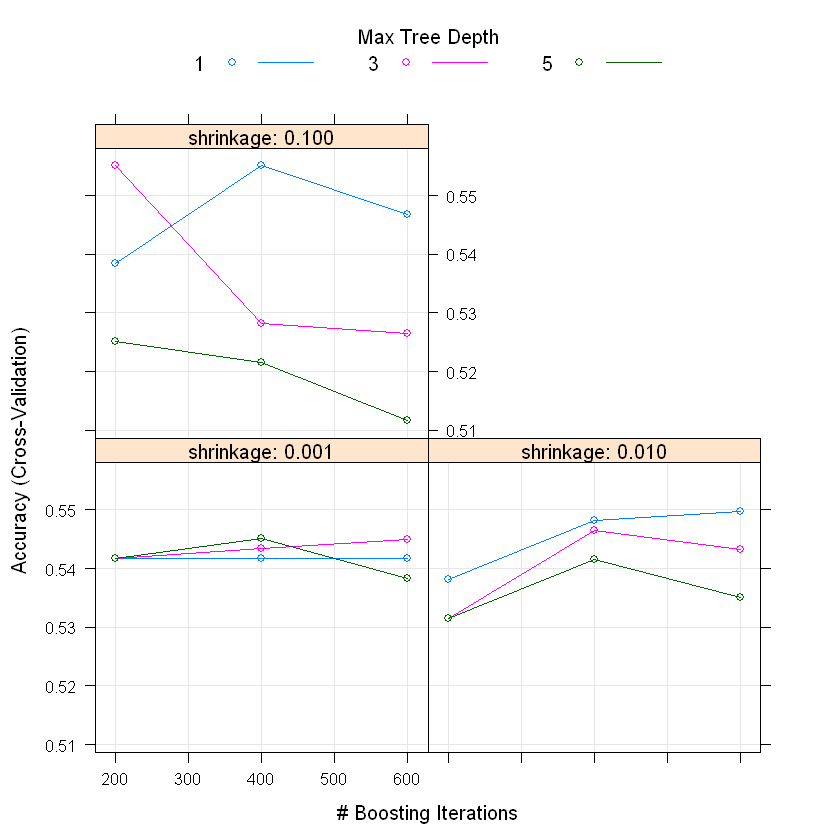

In [110]:
plot(sgb_fit)

In [111]:
#Prediction by using Stochastic Gradient Boosting
predict_sgb = predict(sgb_fit, test_set1 )
confusionMatrix(predict_sgb, test_set1$class)
cm_3 = confusionMatrix(predict_sgb, test_set1$class)
overall_3 <- cm_3$overall
overall.accuracy_3 <- overall_3['Accuracy'] 
comp_sgb = c()
comp_sgb[1]=as.numeric(model_forest_accuracy)
comp_sgb[2]= as.numeric(overall.accuracy_3)
overall.kappa_3 = overall_3['Kappa']
overall.pvalue_3 = overall_3['AccuracyPValue']
comp_sgb[3] = as.numeric(overall.kappa_3)
comp_sgb[4] = as.numeric(overall.pvalue_3)

Confusion Matrix and Statistics

          Reference
Prediction  -1   1
        -1 125 105
        1   86  84
                                          
               Accuracy : 0.5225          
                 95% CI : (0.4723, 0.5724)
    No Information Rate : 0.5275          
    P-Value [Acc > NIR] : 0.5992          
                                          
                  Kappa : 0.0371          
                                          
 Mcnemar's Test P-Value : 0.1928          
                                          
            Sensitivity : 0.5924          
            Specificity : 0.4444          
         Pos Pred Value : 0.5435          
         Neg Pred Value : 0.4941          
             Prevalence : 0.5275          
         Detection Rate : 0.3125          
   Detection Prevalence : 0.5750          
      Balanced Accuracy : 0.5184          
                                          
       'Positive' Class : -1              
                              

In [119]:
#Model Comparison
model = c()
model[1] = "Penalized Regression Approaches (PRA)"
model[2] = "Decision Trees (DT)"
model[3] = "Random Forests (RF)"
model[4] = "Stochastic Gradient Boosting (SGB)"
data=matrix(0,4,5)
data[,1] = t(model)
data[1,2:5] = signif(comp_lasso,digits = 4)
data[2,2:5] = signif(comp_tree, digits =4)
data[3,2:5] = signif(comp_forest, digits =4)
data[4,2:5] = signif(comp_sgb, digits=4)
colnames(data) = c('Model','Accuracy of Model', 'Accuracy Calculated from Confusion Matrix', 'Kappa Calculated from Confusion Matrix',  'P-value Calculated from Confusion Matrix')

In [120]:
data

Model,Accuracy of Model,Accuracy Calculated from Confusion Matrix,Kappa Calculated from Confusion Matrix,P-value Calculated from Confusion Matrix
Penalized Regression Approaches (PRA),0.5417,0.5275,0,0.5203
Decision Trees (DT),0.5318,0.5275,0,0.5203
Random Forests (RF),0.5434,0.5325,0.01116,0.4407
Stochastic Gradient Boosting (SGB),0.555,0.5225,0.03706,0.5992


### According to results of four different model, accuracy of each model is calculated very low, which indicates underfitting.  Random forest approach gives the best result when we focus on the accuracy of model and accuracy calculated between test data and prediction. Additionally, p-values are calculated very high for all methods, which indicates that models generated by all four methods are not sufficient to make prediction. When we look at the kappa values, values ≤ 0 (penalized regression approaches and decision tree) indicates no agreement. Although, kappa values of random forests and stochastic gradient boosting methods are also low, they are better for prediction in this dataset. 